# Practice Exercise Linear Regression
Welcome to the practice exercise on Linear Regression. We strongly recommend you try out all the questions/steps mentioned here and refer to the solution notebook later.

## Case Study: Boston Housing Price Prediction

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.


**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### <a id = "link1">Load the dataset</a>

In [3]:
df = pd.read_csv('Boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [4]:
df.shape

(506, 13)

**Get the info data types column wise**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Get summary statistics around the numerical columns**

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


### Univariate and Bivariate Analysis
Plot the distplots for the features and then plot scatterplots for features and the target variable 

To do - Identify insights if any from the distributuions.

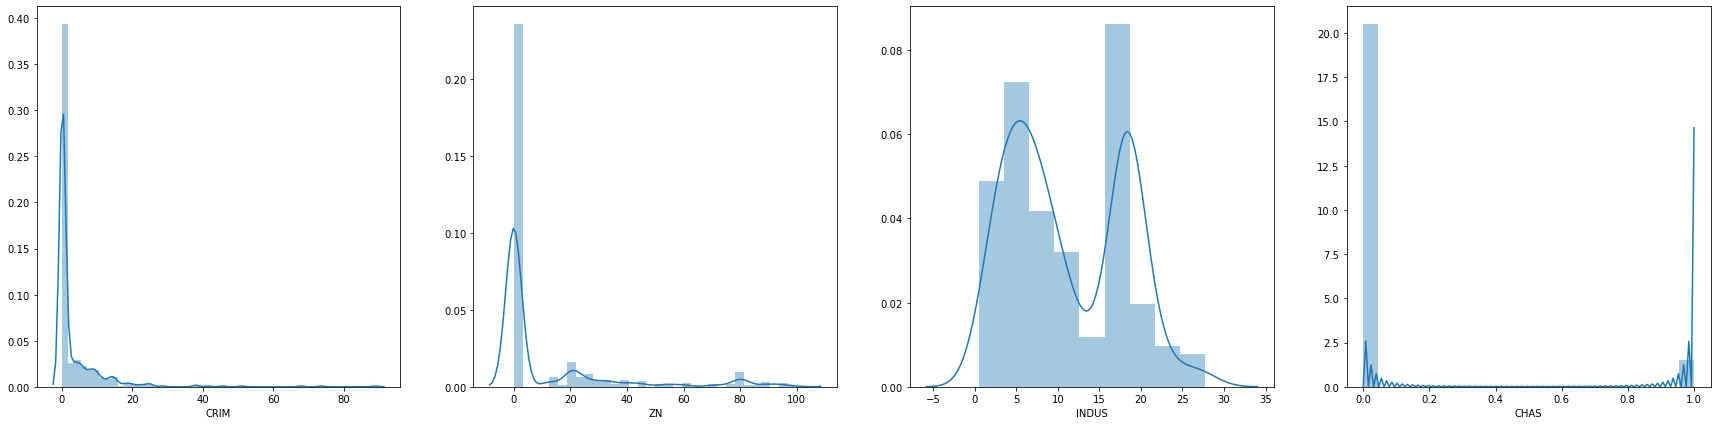

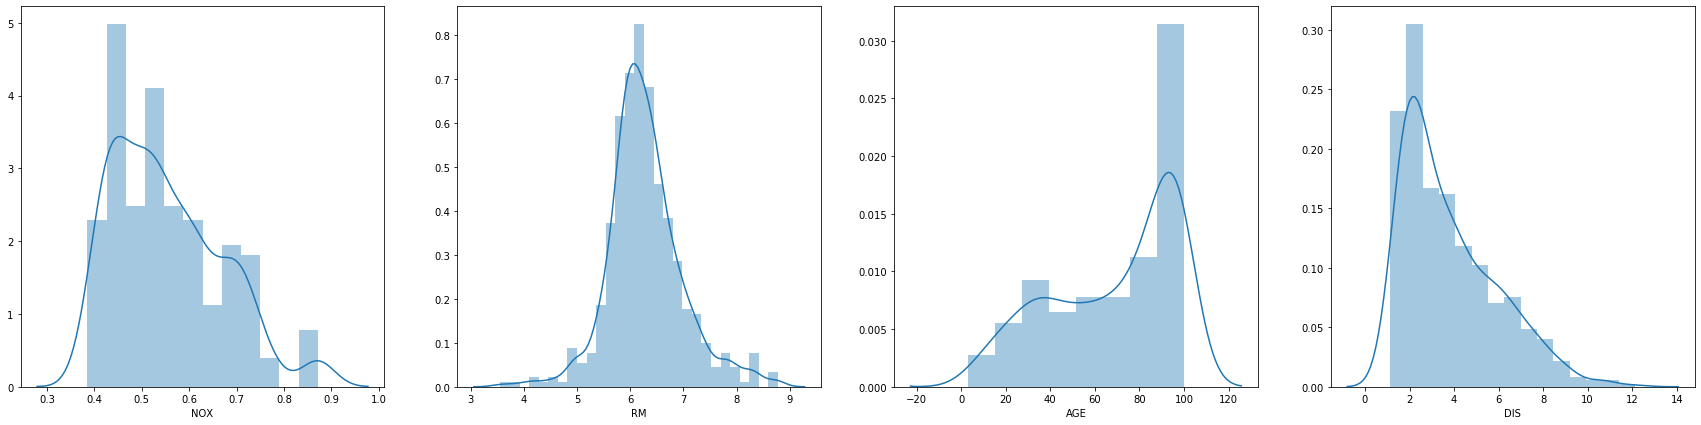

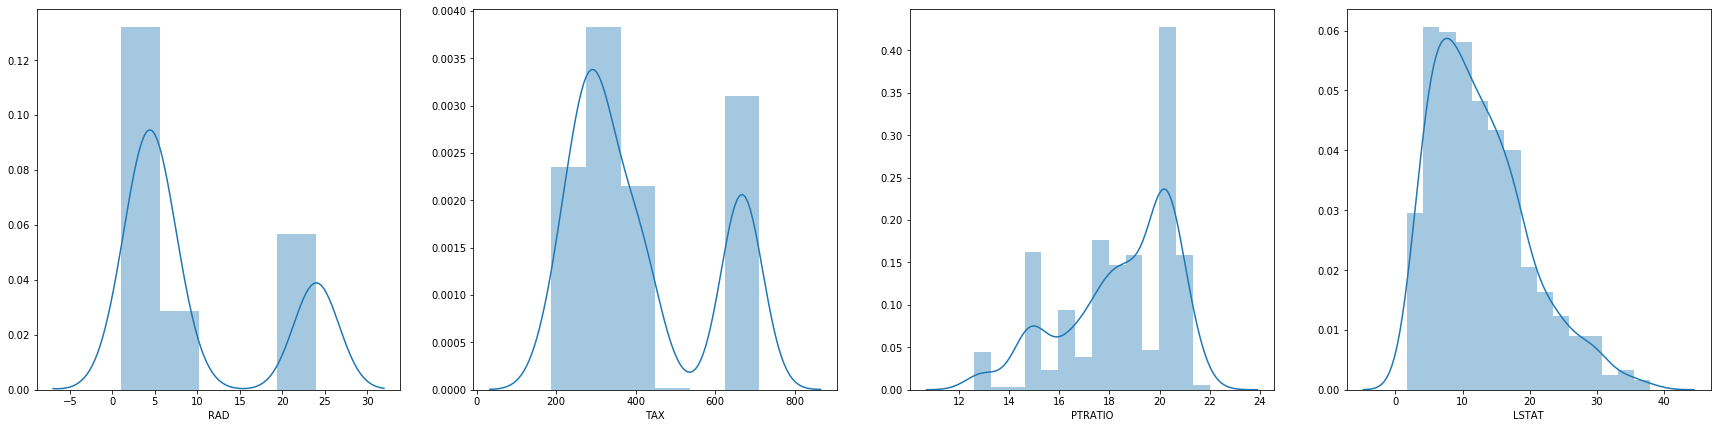

In [7]:
fig, axs1 = plt.subplots(ncols = 4, figsize = (30, 7))
sns.distplot(df.CRIM, ax = axs1[0])
sns.distplot(df.ZN, ax = axs1[1])
sns.distplot(df.INDUS, ax = axs1[2])
sns.distplot(df.CHAS, ax = axs1[3]);

fig, axs2 = plt.subplots(ncols = 4, figsize = (30, 7))
sns.distplot(df.NOX, ax = axs2[0])
sns.distplot(df.RM, ax = axs2[1])
sns.distplot(df.AGE, ax = axs2[2])
sns.distplot(df.DIS, ax = axs2[3]);

fig, axs3 = plt.subplots(ncols = 4, figsize = (30, 7))
sns.distplot(df.RAD, ax = axs3[0])
sns.distplot(df.TAX, ax = axs3[1])
sns.distplot(df.PTRATIO, ax = axs3[2])
sns.distplot(df.LSTAT, ax = axs3[3]);

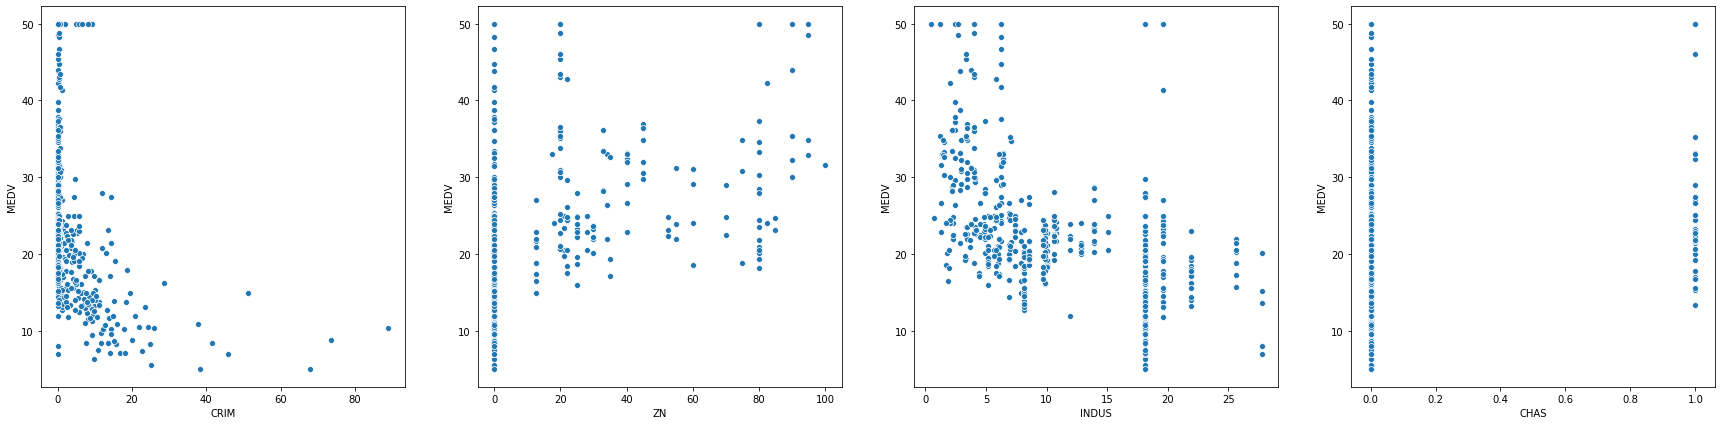

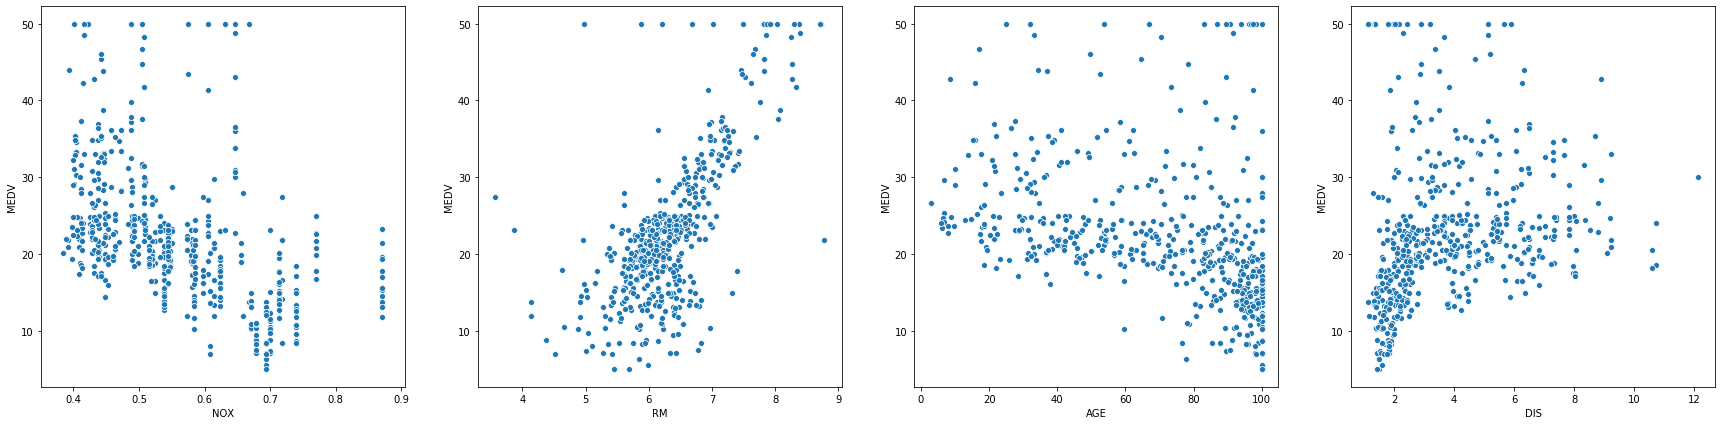

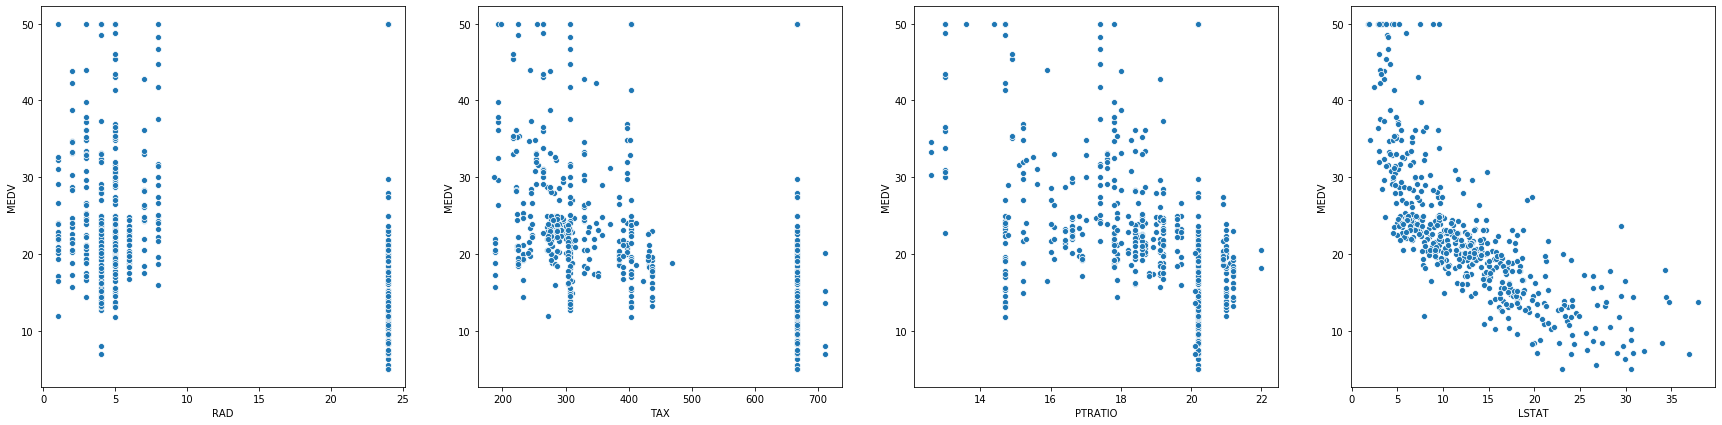

In [8]:
fig, axs1 = plt.subplots(ncols = 4, figsize = (30, 7))
sns.scatterplot(x=df.CRIM, y=df.MEDV, ax = axs1[0])
sns.scatterplot(x=df.ZN,y=df.MEDV, ax = axs1[1])
sns.scatterplot(x=df.INDUS,y=df.MEDV, ax = axs1[2])
sns.scatterplot(x=df.CHAS,y=df.MEDV, ax = axs1[3]);

fig, axs2 = plt.subplots(ncols = 4, figsize = (30, 7))
sns.scatterplot(x=df.NOX,y=df.MEDV, ax = axs2[0])
sns.scatterplot(x=df.RM,y=df.MEDV, ax = axs2[1])
sns.scatterplot(x=df.AGE,y=df.MEDV, ax = axs2[2])
sns.scatterplot(x=df.DIS,y=df.MEDV, ax = axs2[3]);

fig, axs3 = plt.subplots(ncols = 4, figsize = (30, 7))
sns.scatterplot(x=df.RAD,y=df.MEDV, ax = axs3[0])
sns.scatterplot(x=df.TAX,y=df.MEDV, ax = axs3[1])
sns.scatterplot(x=df.PTRATIO,y=df.MEDV, ax = axs3[2])
sns.scatterplot(x=df.LSTAT,y=df.MEDV, ax = axs3[3]);

**Get the Correlation Heatmap**

In [7]:
# Let us create a new feature using the TAX and RAD.
df['RadTax'] = df['RAD']/df['TAX']

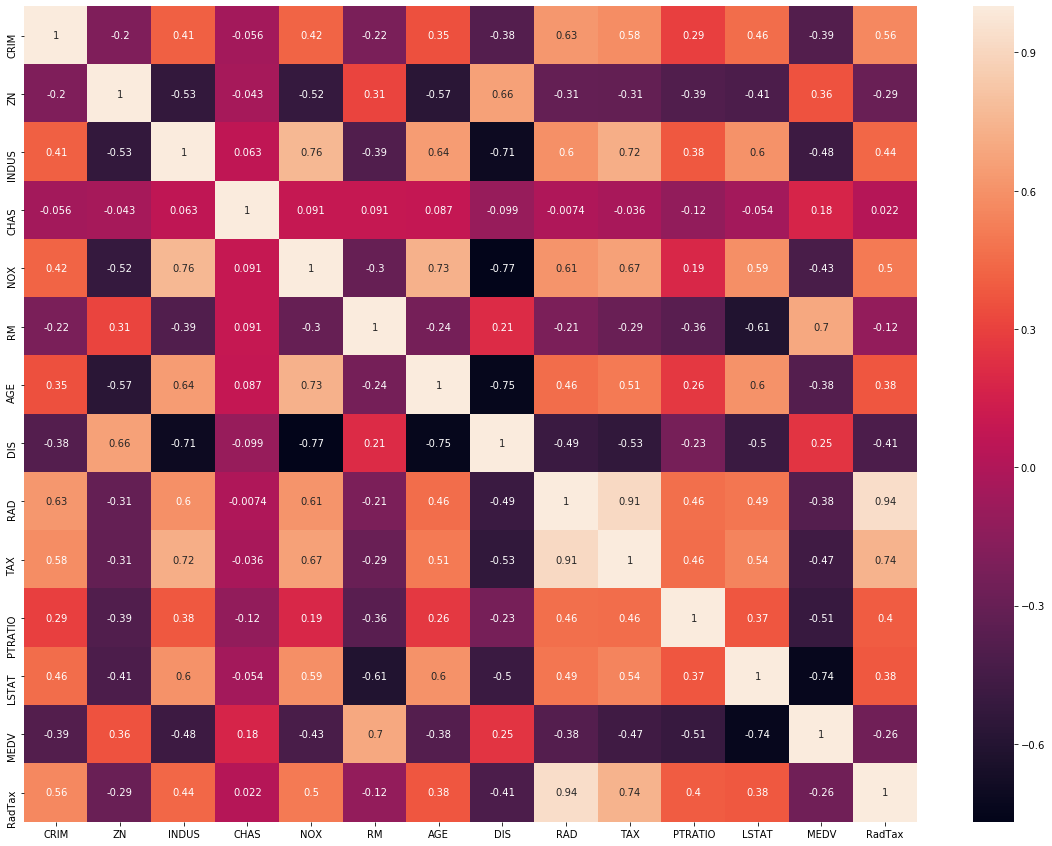

In [10]:
plt.figure(figsize=[20,15])
sns.heatmap(df.corr(),annot=True)
plt.show()

### <a id = "link2">Split the dataset</a>
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [8]:
dfX = df.drop('MEDV',axis=1)
dfy = df[['MEDV']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dfX,dfy,test_size=0.3, random_state=1)

### <a id = "link3">Using Linear Model from Scikit learn library</a>

**Fit the model to the training set**

In [10]:
lr_mdl = LinearRegression()
lr_mdl.fit(X_train,y_train)

LinearRegression()

**Get the score on training set**

In [11]:
lr_mdl.score(X_train,y_train)

0.7077132931309869

**Write your own function for the r-squared score**

Co-efficient of determination
$$ R ^2 = \frac{SSR}{SST} $$

Since $ SSR = (SST - SSE) $,
$$ R^2 = \frac{SST - SSE}{SST} $$

This can be written as,
$$ R^2 = 1 - \frac{SSE}{SST} $$

which can be expanded as,
$$ R^2 = 1 - \frac{\Sigma e_i^2}{\Sigma(y_i - \bar y)^2} $$



Summation of Residual square $ \Sigma e_i^2 $ is,
$$ \Sigma e_i^2 = \Sigma(y_i - \hat y_i)^2 $$

Hence,
$$ R^2 = 1 - \frac{\Sigma(y_i - \hat y_i)^2 }{\Sigma(y_i - \bar y)^2} $$


In [12]:
def rsqrd(mdl,X,y):
    y_mean = y.mean()
    SST = ((y - y_mean)**2).sum()
    SSE = ((y - mdl.predict(X))**2).sum()
    r2 = 1-(SSE/SST)
    return SSE, SST, r2

SSE, SST,r2 = rsqrd(lr_mdl,X_train,y_train)

print('SSE : ',SSE.MEDV)
print('SST : ',SST.MEDV)
print('Rsquare : ',r2.MEDV)


SSE :  8400.59131142169
SST :  28740.928389830508
Rsquare :  0.7077132931309869


**Get the score on test set**

In [13]:
lr_mdl.score(X_test,y_test)

0.7747487100790016

**Get the RMSE on test set**

Root Mean Square Error (RMSE) is,
$$ s_e = \sqrt \frac{ \Sigma e_i^2}{ n-2 } $$

but,
$$ \Sigma e_i^2 = \Sigma(y_i - \hat y_i)^2 $$

Hence,
$$ s_e = \sqrt \frac{ \Sigma (y_i - \hat y_i)^2}{ n-2 } $$


In [28]:
from sklearn.metrics import mean_squared_error

def rmse(mdl,X,y):
#     all manual method below commented
#     SSE = ((y-mdl.predict(X))**2).sum()
#     se = np.sqrt(SSE.MEDV/(y.MEDV.count()-2))
    se = np.sqrt(mean_squared_error(y,mdl.predict(X)))
    return se

se = rmse(lr_mdl,X_test, y_test)
print('RMSE on Test dataset : ',se)

RMSE on Test dataset :  4.543708996703914


**Get model Coefficients**

In [15]:
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = lr_mdl.coef_[0]
coeff_data['Feature'] = X_train.columns
coeff_data = coeff_data.append({'Coefs': lr_mdl.intercept_[0], 'Feature': "Intercept"}, ignore_index = True)
coeff_data

,Coefs,Feature
0,-0.111646,CRIM
1,0.063623,ZN
2,0.058160,INDUS
3,2.481265,CHAS
4,-22.288445,NOX
5,2.705046,RM
6,0.004333,AGE
7,-1.553844,DIS
8,0.163573,RAD
9,-0.008756,TAX


**Automate the equation of the fit**

Multi Regression Equation is
$$ y = a + b_1.x_1 + b_2.x_2 + .... + b_n.x_n $$

In this case,
$$ Price = Intercept + Coef0.CRIM + Coef1.ZN + Coef2.INDUS + Coef3.CHAS + Coef4.NOX + Coef5.RM + Coef6.AGE + Coef7.DIS + Coef8.RAD + Coef9.TAX + Coef10.PTRATIO + Coef11.LSTAT + Coef12.RadTax $$ 

In [79]:
eqn = 'Price = ' + str(coeff_data.iloc[13].Coefs)
print(eqn,end=' ')
for i in range(0,13):
    print(' + (',str(coeff_data.iloc[i].Coefs),')*',coeff_data.iloc[i].Feature,end=' ')


Price = 48.39603086438868  + ( -0.1116455734870058 )* CRIM  + ( 0.0636226029154487 )* ZN  + ( 0.05816017806553465 )* INDUS  + ( 2.4812645928411254 )* CHAS  + ( -22.28844492809687 )* NOX  + ( 2.705045969347994 )* RM  + ( 0.0043332061246766805 )* AGE  + ( -1.5538441948939106 )* DIS  + ( 0.16357314875579734 )* RAD  + ( -0.008756354173498427 )* TAX  + ( -0.9766725794264158 )* PTRATIO  + ( -0.584633369854607 )* LSTAT  + ( 72.92287256820521 )* RadTax 

## <a id = "link4">Bonus: Using Statsmodels OLS</a>

In [25]:
import statsmodels.api as sm

In [17]:
Xc=sm.add_constant(dfX)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, dfy, test_size=0.30 , random_state=1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Make the linear model using OLS**

In [18]:
ols_mdl = sm.OLS(y_trainc,X_trainc).fit()
ols_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     63.33
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.66e-82
Time:                        17:46:10   Log-Likelihood:                -1062.8
No. Observations:                 354   AIC:                             2154.
Df Residuals:                     340   BIC:                             2208.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3960      6.555      7.383      0.000      35.502      61.290
CRIM          -0.1116      0.043     -2.585      0.010      -0.197      -0.027
ZN             0.0636      0.019      3.344      0.001       0.026       0.101
INDUS          0.0582      0.077      0.751      0.453      -0.094       0.210
CHAS           2.4813      0.986      2.517      0.012       0.542       4.421
NOX          -22.2884      4.700     -4.742      0.000     -31.534     -13.043
RM             2.7050      0.521      5.191      0.000       1.680       3.730
AGE            0.0043      0.017      0.261      0.795      -0.028       0.037
DIS           -1.5538      0.260     -5.972      0.000      -2.066      -1.042
RAD            0.1636      0.232      0.705      0.481      -0.293       0.620
TAX           -0.0088      0.007     -1.344      0.180      -0.022       0.004
PTRATIO       -0.9767      0.173     -5.650      0.000      -1.317      -0.637
LSTAT         -0.5846      0.062     -9.500      0.000      -0.706      -0.464
RadTax        72.9229    115.940      0.629      0.530    -155.127     300.973
==============================================================================
Omnibus:                      135.944   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.381
Skew:                           1.641   Prob(JB):                    1.53e-121
Kurtosis:                       8.191   Cond. No.                     1.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Get the value of coefficient of determination**

Co-efficient of Determination is $ R^2 $ 

This is "Variation in Independent Variable which is explained by the Dependent Variable" 

In [19]:
print('R^2 : ',ols_mdl.rsquared*100, '%')

R^2 :  70.77132931309868 %


**Get the Predictions on test set**

In [21]:
ypred = ols_mdl.predict(X_testc)
ypred

307    33.110184
343    27.951617
47     17.544436
67     21.602211
362    18.564290
132    20.028318
292    32.894115
31     17.880567
218    24.656917
90     26.497539
481    26.828686
344    28.672995
119    21.137929
66     27.179652
312    23.227499
407    20.934061
376    16.492929
225    37.747853
201    30.599814
147     7.899509
315    20.715469
146    17.284302
314    24.906295
324    24.844233
65     31.739954
425    12.673143
34     14.280572
345    16.335158
261    35.769663
389    14.063750
         ...    
41     27.312152
361    18.292551
289    27.638581
498    21.086579
293    26.049656
502    21.867978
172    23.327769
80     28.302261
46     20.296538
318    23.792154
93     29.901579
392     9.826530
81     27.041279
304    33.076495
142    13.384031
456    15.451416
180    32.891199
380    12.536895
355    17.932812
139    16.167894
106    17.117324
238    28.918164
290    34.339554
246    20.441520
320    24.595598
467    17.167904
95     28.343424
122    20.5322

**Calculate MSE for training set**

In [22]:
mse = mean_squared_error(y_trainc,ols_mdl.predict(X_trainc))
mse

23.730483930569747

**Get the RMSE on training set**

In [23]:
rmse = np.sqrt(mse)
rmse

4.871394454421623

**Get the RMSE on test set**

In [30]:
rmse_tst = np.sqrt(mean_squared_error(y_testc,ols_mdl.predict(X_testc)))
rmse_tst

4.543708996703849